In [3]:
import pandas as pd
pd.read_csv("../data/processed/final_features.csv").head()

,date,load,lag_1,lag_7,rolling_mean_7,day,month,day_of_week
0,2019-01-09,56.4,76.2,82.3,75.171429,9,1,2
1,2019-01-10,69.9,56.4,82.0,73.442857,10,1,3
2,2019-01-11,76.2,69.9,82.9,72.485714,11,1,4
3,2019-01-12,82.3,76.2,77.0,73.242857,12,1,5
4,2019-01-13,87.7,82.3,76.4,74.857143,13,1,6


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/processed/final_features.csv")
df.head()


,date,load,lag_1,lag_7,rolling_mean_7,day,month,day_of_week
0,2019-01-09,56.4,76.2,82.3,75.171429,9,1,2
1,2019-01-10,69.9,56.4,82.0,73.442857,10,1,3
2,2019-01-11,76.2,69.9,82.9,72.485714,11,1,4
3,2019-01-12,82.3,76.2,77.0,73.242857,12,1,5
4,2019-01-13,87.7,82.3,76.4,74.857143,13,1,6


In [5]:
X = df.drop(columns=["date", "load"])
y = df["load"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (491, 6)
y shape: (491,)


In [6]:
train_size = int(len(df) * 0.8)

X_train = X.iloc[:train_size]
X_test  = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 392
Testing samples: 99


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
models = {
    "Linear Regression": LinearRegression(),

    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200,
        random_state=42
    ),

    "SVR": SVR(kernel="rbf")
}


In [9]:
results = []

for name, model in models.items():
    print(f"Training {name}...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2_Score": r2
    })


Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...
Training SVR...


In [10]:
results_df = pd.DataFrame(results)
results_df


,Model,MAE,RMSE,R2_Score
0,Linear Regression,6.824582,9.908614,0.588137
1,Random Forest,6.988924,9.627539,0.611172
2,Gradient Boosting,7.397497,9.933335,0.586079
3,SVR,7.492512,10.420925,0.544446


In [11]:
results_df.to_csv("../results/model_comparison.csv", index=False)


In [12]:
results_df


,Model,MAE,RMSE,R2_Score
0,Linear Regression,6.824582,9.908614,0.588137
1,Random Forest,6.988924,9.627539,0.611172
2,Gradient Boosting,7.397497,9.933335,0.586079
3,SVR,7.492512,10.420925,0.544446


In [13]:
best_model_name = results_df.sort_values("RMSE").iloc[0]["Model"]
best_model_name


'Random Forest'

In [14]:
# Re-create model dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200,
        random_state=42
    ),
    "SVR": SVR(kernel="rbf")
}

best_model = models[best_model_name]

# Train on training data
best_model.fit(X_train, y_train)

print("Best model trained:", best_model_name)


Best model trained: Random Forest


In [15]:
import joblib

joblib.dump(best_model, "../models/best_model.pkl")

print("✅ Best model saved to models/best_model.pkl")


✅ Best model saved to models/best_model.pkl


In [16]:
import joblib

best_model = joblib.load("../models/best_model.pkl")
print("✅ Best model loaded successfully")


✅ Best model loaded successfully


In [17]:
df = pd.read_csv("../data/processed/final_features.csv")
df.tail()


,date,load,lag_1,lag_7,rolling_mean_7,day,month,day_of_week
486,2020-12-01,82.9,83.0,99.3,91.557143,1,12,1
487,2020-12-02,85.0,82.9,106.2,88.528571,2,12,2
488,2020-12-03,85.4,85.0,107.8,85.328571,3,12,3
489,2020-12-04,70.0,85.4,101.6,80.814286,4,12,4
490,2020-12-05,61.7,70.0,83.7,77.671429,5,12,5


In [18]:
latest_features = df.drop(columns=["date", "load"]).iloc[-1:]
latest_features


,lag_1,lag_7,rolling_mean_7,day,month,day_of_week
490,70.0,83.7,77.671429,5,12,5


In [19]:
predicted_load = best_model.predict(latest_features)
predicted_load


array([75.9485])

In [20]:
print(f"🔮 Predicted electricity load for next day: {predicted_load[0]:.2f}")


🔮 Predicted electricity load for next day: 75.95


In [21]:
# Predict on test data
y_test_pred = best_model.predict(X_test)


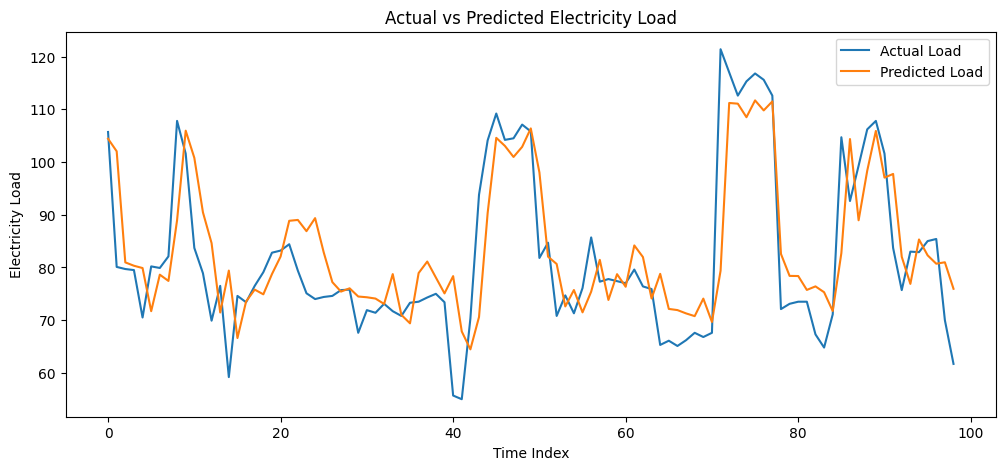

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual Load")
plt.plot(y_test_pred, label="Predicted Load")
plt.xlabel("Time Index")
plt.ylabel("Electricity Load")
plt.title("Actual vs Predicted Electricity Load")
plt.legend()
plt.show()


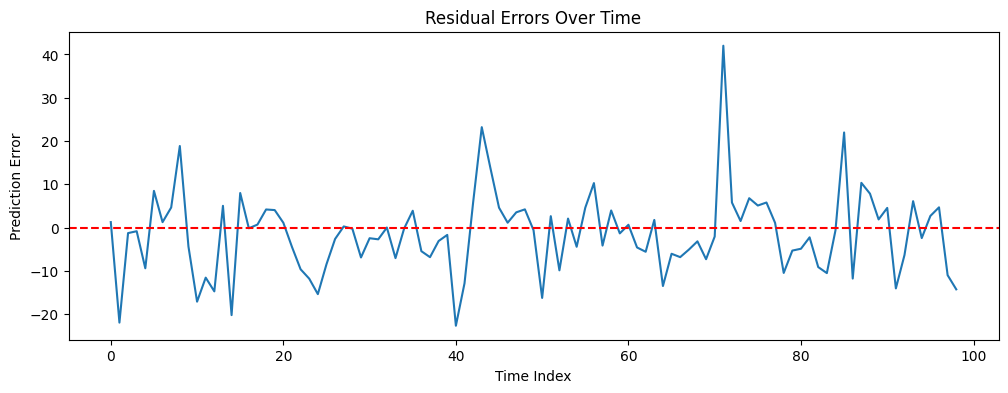

In [23]:
residuals = y_test.values - y_test_pred

plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Errors Over Time")
plt.xlabel("Time Index")
plt.ylabel("Prediction Error")
plt.show()
